<h1>Reconocimiento de dígitos manuscritos con RF<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

En este notebook vamos a intentar resolver el problema de reconocimiento de dígitos escritos a mano, aplicando Random Forests.

In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Cargamos el dataset disponible en sklearn:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Visualizamos una muestra de los datos:

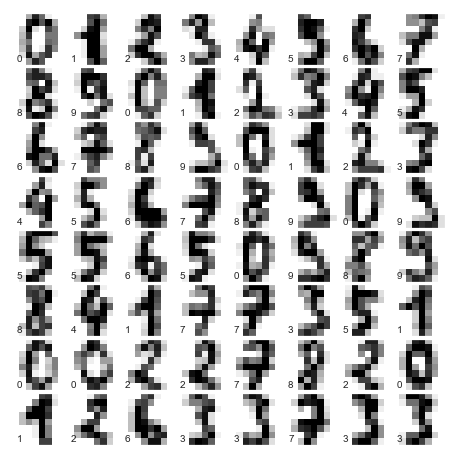

In [3]:
fig = plt.figure(figsize=(6, 6))  # en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Pintamos los dígitos: cada imagen consta de 8x8 pixeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Etiquetamos la imagen con el valor target
    ax.text(0, 7, str(digits.target[i]))

Podemos clasificar inmediatamente los dígitos usando Random Forest:

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Echamos un vistazo al informe de clasificación:

In [5]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Pintamos la matriz de confusión:

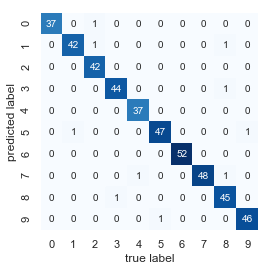

In [6]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

Observamos como el resultado es mucho mejor que aplicando Naive Bayes como hicimos en la introducción a Scikit-Learn.